In [1]:
from deimkit import list_models, load_model

In [2]:
list_models()

['deim_hgnetv2_n',
 'deim_hgnetv2_s',
 'deim_hgnetv2_m',
 'deim_hgnetv2_l',
 'deim_hgnetv2_x']

In [3]:
model = load_model(
    "deim_hgnetv2_s",
    checkpoint="/home/dnth/Desktop/DEIMKit/nbs/outputs/deim_hgnetv2_s_pcb_100e/best.pth",
    class_names=[
        "Holes",
        "missing hole",
    ],
)

2025-03-11 13:01:21.121 | INFO     | deimkit.predictor:__init__:41 - Initializing Predictor with device=auto
2025-03-11 13:01:21.301 | INFO     | deimkit.predictor:__init__:60 - Auto-selected device: cuda
2025-03-11 13:01:21.302 | INFO     | deimkit.predictor:__init__:68 - Using custom checkpoint: /home/dnth/Desktop/DEIMKit/nbs/outputs/deim_hgnetv2_s_pcb_100e/best.pth
2025-03-11 13:01:21.305 | DEBUG    | deimkit.predictor:__init__:90 - Successfully initialized distributed environment
2025-03-11 13:01:21.305 | INFO     | deimkit.predictor:__init__:101 - Loading configuration from model name: deim_hgnetv2_s
/home/dnth/Desktop/DEIMKit/src/deimkit/predictor.py:112: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for

In [4]:
result = model.predict(
    "/home/dnth/Downloads/PCB Holes.v4i.coco/test/light_07_missing_hole_09_3_600_jpg.rf.8bca4baa337cef53f03ea7cc10a145f1.jpg",
    visualize=True,
)

2025-03-11 13:01:21.777 | DEBUG    | deimkit.predictor:predict:260 - Loading image from path: /home/dnth/Downloads/PCB Holes.v4i.coco/test/light_07_missing_hole_09_3_600_jpg.rf.8bca4baa337cef53f03ea7cc10a145f1.jpg
2025-03-11 13:01:22.210 | DEBUG    | deimkit.predictor:predict:300 - Prediction complete. Found 3 objects
2025-03-11 13:01:22.211 | DEBUG    | deimkit.predictor:predict:303 - Generating visualization


In [5]:
result

{'boxes': array([[239.7243 , 394.9613 , 273.87714, 454.75928],
        [239.0377 , 395.00854, 272.9737 , 454.56802],
        [512.70605, 569.762  , 576.679  , 640.32117]], dtype=float32),
 'labels': array([1, 1, 1]),
 'scores': array([0.7714254, 0.4092074, 0.3241421], dtype=float32),
 'class_names': ['missing hole', 'missing hole', 'missing hole'],
 'visualization': <PIL.Image.Image image mode=RGB size=640x640>}

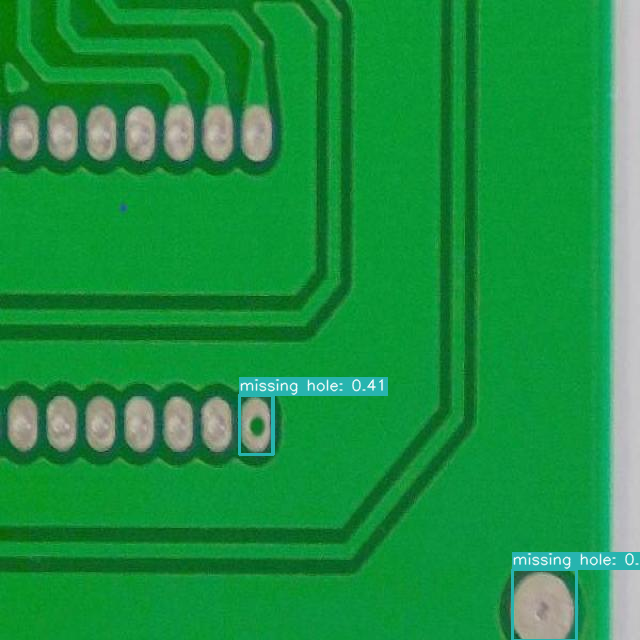

In [6]:
result["visualization"]

In [7]:
# Load folder of images
import glob

image_paths = glob.glob("/home/dnth/Downloads/PCB Holes.v4i.coco/test/*.jpg")

image_paths


['/home/dnth/Downloads/PCB Holes.v4i.coco/test/light_11_missing_hole_06_3_600_jpg.rf.83bb3f681a8f420c54ad2ebb8e707717.jpg',
 '/home/dnth/Downloads/PCB Holes.v4i.coco/test/light_07_missing_hole_09_3_600_jpg.rf.8bca4baa337cef53f03ea7cc10a145f1.jpg',
 '/home/dnth/Downloads/PCB Holes.v4i.coco/test/light_08_missing_hole_04_1_600_jpg.rf.4bac1e3d0a3c46dd01df9b09c77730d9.jpg',
 '/home/dnth/Downloads/PCB Holes.v4i.coco/test/light_07_missing_hole_09_4_600_jpg.rf.07ba3b37518031580d4fe292204163d0.jpg',
 '/home/dnth/Downloads/PCB Holes.v4i.coco/test/light_11_missing_hole_02_1_600_jpg.rf.6e2a4d72155a25968fd509f937816c0f.jpg',
 '/home/dnth/Downloads/PCB Holes.v4i.coco/test/light_08_missing_hole_04_4_600_jpg.rf.bb786f16626348c92642ff398d1e95f5.jpg',
 '/home/dnth/Downloads/PCB Holes.v4i.coco/test/light_09_missing_hole_09_1_600_jpg.rf.d7c3749eab78fd0e8c0072fb57b611fc.jpg',
 '/home/dnth/Downloads/PCB Holes.v4i.coco/test/light_09_missing_hole_08_4_600_jpg.rf.4d53bbcd7cda66488eba42d60e040f90.jpg',
 '/home/

In [12]:
results = model.predict_batch(image_paths[0:6], conf_threshold=0.1, visualize=True)

2025-03-11 13:02:03.517 | INFO     | deimkit.predictor:predict_batch:338 - Processing batch of 6 images with batch_size=16
2025-03-11 13:02:03.518 | DEBUG    | deimkit.predictor:predict_batch:351 - Loading image 0 from path: /home/dnth/Downloads/PCB Holes.v4i.coco/test/light_11_missing_hole_06_3_600_jpg.rf.83bb3f681a8f420c54ad2ebb8e707717.jpg
2025-03-11 13:02:03.522 | DEBUG    | deimkit.predictor:predict_batch:351 - Loading image 1 from path: /home/dnth/Downloads/PCB Holes.v4i.coco/test/light_07_missing_hole_09_3_600_jpg.rf.8bca4baa337cef53f03ea7cc10a145f1.jpg
2025-03-11 13:02:03.529 | DEBUG    | deimkit.predictor:predict_batch:351 - Loading image 2 from path: /home/dnth/Downloads/PCB Holes.v4i.coco/test/light_08_missing_hole_04_1_600_jpg.rf.4bac1e3d0a3c46dd01df9b09c77730d9.jpg
2025-03-11 13:02:03.534 | DEBUG    | deimkit.predictor:predict_batch:351 - Loading image 3 from path: /home/dnth/Downloads/PCB Holes.v4i.coco/test/light_07_missing_hole_09_4_600_jpg.rf.07ba3b37518031580d4fe29220

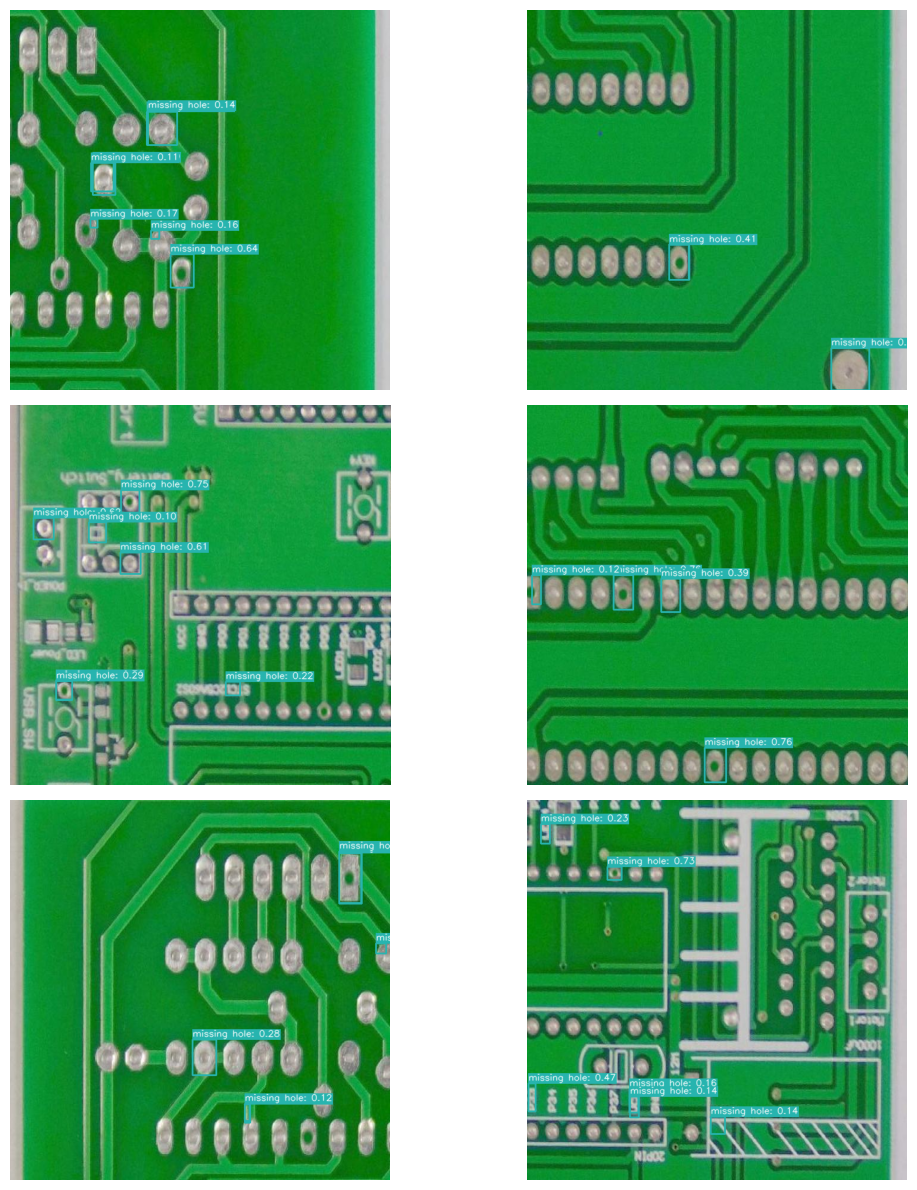

In [13]:
# Plot results in a grid
import matplotlib.pyplot as plt
import math

n_cols = 2
n_rows = math.ceil(len(results) / n_cols)
plt.figure(figsize=(12, 4 * n_rows))

for i, result in enumerate(results):
    plt.subplot(n_rows, n_cols, i + 1)
    plt.imshow(result["visualization"])
    plt.axis("off")
plt.tight_layout()
plt.show()